# Sistema expert de lógica difusa per dectar joves centrocampistes amb un bon potencial

En aquest exemple es mostra com crear un sistema expert de lògica difusa per detectar joves centrocampistes amb un bon potencial. Ens basarem en el treball de Luka Radovanović, estudiant de la Universitat de Belgrad. El resultat del treball es pot trobar a: https://github.com/lukadlm97/football-manager-researching/tree/master

## Plantejament del problema

Un dels problemes que es troben els equips de futbol és la detecció de joves jugadors amb potencial. Per aixó anem an crear un sistema expert de lògica difusa que ens ajudi a detectar joves centrocampistes ofensius amb potencial. 

Hem triat la posició de Centrocampista ofensiu perquè és una posició de les més difícils de trobar i per tant és una posició que els equips busquen molt. A més, és una posició on molts dels millors jugadors de la història han jugat, com ara: Di Stefano, Maradona, Zidane, Platini, etc.


## Anàlisi de les dades

En primer lloc carreguem les dades (`players_22.csv`) i veiem com estan estructurades.
Carregarem les dades en un dataframe de Pandas i observem les primeres files.


In [50]:
import pandas as pd

df = pd.read_csv('players_22.csv')
df.head()

/var/folders/zm/06zm__c5637bs4z8mhp4pfph0000gn/T/ipykernel_26478/139214782.py:3: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('players_22.csv')


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


També ens serà útil que sen's descriguin les dades per conèixer la seva distribució.

In [51]:
df.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


Com ja hem dit, busquem Centrocampistes ofensius joves, per lo que llevarem tots els jugadors que no juguen en aquesta posició (CAM, Centre Attacking Mifielder) o tinguen més de 24 anys.

In [52]:
df = df[(df['player_positions'].str.contains('CAM')) & (df['age'] <= 24)]
df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
138,235790,https://sofifa.com/player/235790/kai-havertz/2...,K. Havertz,Kai Lukas Havertz,"CAM, CF, CM",84,92,94500000.0,130000.0,22,...,55+3,55+3,55+3,62+3,17+3,https://cdn.sofifa.net/players/235/790/22_120.png,https://cdn.sofifa.net/teams/5/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png
139,237692,https://sofifa.com/player/237692/phil-foden/22...,P. Foden,Philip Foden,"CAM, LW, CM",84,92,94500000.0,125000.0,21,...,59+3,59+3,59+3,68+3,19+3,https://cdn.sofifa.net/players/237/692/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png
193,233064,https://sofifa.com/player/233064/mason-mount/2...,M. Mount,Mason Mount,"CAM, CM, RW",83,89,58500000.0,120000.0,22,...,60+3,60+3,60+3,68+3,19+3,https://cdn.sofifa.net/players/233/064/22_120.png,https://cdn.sofifa.net/teams/5/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png
252,220697,https://sofifa.com/player/220697/james-maddiso...,J. Maddison,James Maddison,"CAM, CM",82,85,41500000.0,100000.0,24,...,57+2,57+2,57+2,65+2,20+2,https://cdn.sofifa.net/players/220/697/22_120.png,https://cdn.sofifa.net/teams/95/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png
254,222665,https://sofifa.com/player/222665/martin-odegaa...,M. Ødegaard,Martin Ødegaard,"CAM, CM",82,88,49000000.0,89000.0,22,...,60+3,60+3,60+3,68+3,19+3,https://cdn.sofifa.net/players/222/665/22_120.png,https://cdn.sofifa.net/teams/1/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1352/60.png,https://cdn.sofifa.net/flags/no.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19169,264072,https://sofifa.com/player/264072/bernardo-oliv...,Bernardo,Bernardo Oliveira,CAM,49,67,120000.0,500.0,17,...,39+2,39+2,39+2,42+2,14+2,https://cdn.sofifa.net/players/264/072/22_120.png,https://cdn.sofifa.net/teams/111393/60.png,https://cdn.sofifa.net/flags/au.png,NaN,https://cdn.sofifa.net/flags/br.png
19171,264142,https://sofifa.com/player/264142/aaron-doran/2...,A. Doran,Aaron Doran,CAM,49,62,110000.0,500.0,18,...,42+2,42+2,42+2,44+2,14+2,https://cdn.sofifa.net/players/264/142/22_120.png,https://cdn.sofifa.net/teams/305/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19194,259649,https://sofifa.com/player/259649/engson-singh/...,E. Singh,Engson Singh,"CAM, CM",48,65,120000.0,500.0,18,...,37+2,37+2,37+2,41+2,12+2,https://cdn.sofifa.net/players/259/649/22_120.png,https://cdn.sofifa.net/teams/113146/60.png,https://cdn.sofifa.net/flags/in.png,NaN,https://cdn.sofifa.net/flags/in.png
19233,261818,https://sofifa.com/player/261818/ronan-gallagh...,R. Gallagher,Ronan Gallagher,CAM,47,61,110000.0,500.0,20,...,39+2,39+2,39+2,41+2,15+2,https://cdn.sofifa.net/players/261/818/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


## Anàlisi del potencial

Per fer una primera aproximació al potencial dels jugadors, hem fet un primera hipòtesi que ens diu que els jugadors amb més potencial són els que son molt joves i tenen una gran capacitat de passar la pilota. 

Crearem llavors un sistema difús amb dues variables d'entrada: l'edat i la capacitat de passar la pilota. La variable de sortida serà el potencial.

El resum de les regles proposades és el següent:

### Relació entre l'edat i la categoria lingüística

| Edat  | Categoria   |
|-------|-------------|
| 16-18 | Jove        |
| 17-21 | Junior      |
| 20-24 | Senior-jove |

### Relació entre la capacitat de passar la pilota i la categoria lingüística

| Passar la pilota | Categoria   |
|------------------|-------------|
| <=60             | Baixa       |
| 60-85            | Mitjana     |
| >=80-100         | Alta        |

### Relació entre la categoría lingüística de potencial i el seu valor numèric

Les variables de sortida seràn triangulars.

| Potencial | Valor numèric |
|-----------|---------------|
| Baix      | <40           |
| Mitjà     | 10 - 90       |
| Alt       | 60 - 100      |

Definix els antecedents i el consequent amb les seves funcions d'adhesió.


/Users/carlesgm/DataspellProjects/Notebooks/venv/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


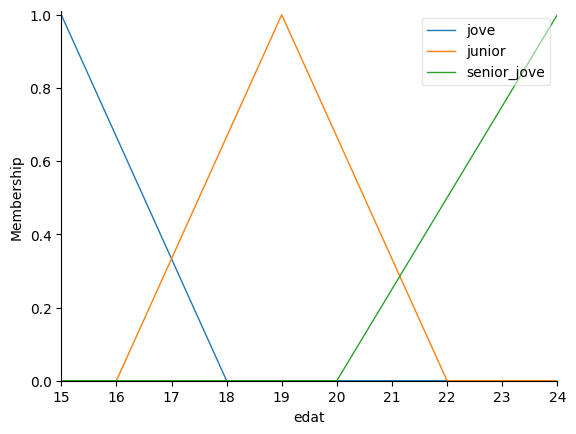

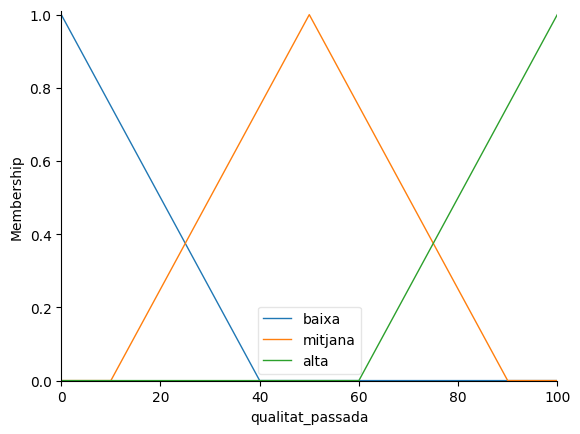

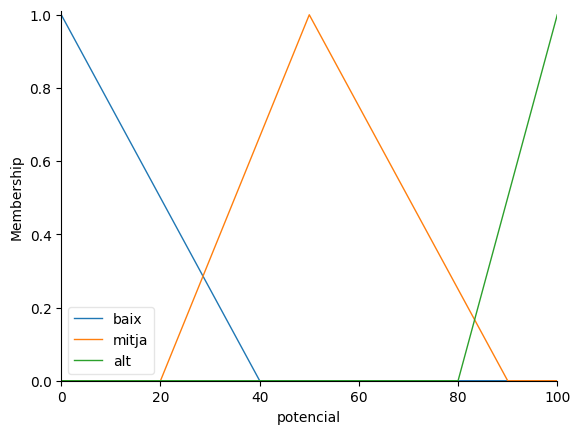

## Regles

Hem de definir les regles que relacionen les variables d'entrada amb la variable de sortida. Serán les següents:

| Edat        | Qualitat passada | Potencial |
|-------------|------------------|-----------|
| Jove        | Alta             | Alt       |
| Jove        | Mitjana          | Mitja     |
| Jove        | Baixa            | Mitja     |
| Junior      | Alta             | Alt       |
| Junior      | Mitjana          | Mitja     |
| Junior      | Baixa            | Baix      |
| Senior-jove | Alta             | Alt       |
| Senior-jove | Mitjana          | Baix      |
| Senior-jove | Baixa            | Baix      |

Crea les regles per al nostre sistema y el sistema de control. Visualitza les dependències. 

/Users/carlesgm/DataspellProjects/Notebooks/venv/lib/python3.11/site-packages/skfuzzy/control/controlsystem.py:133: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


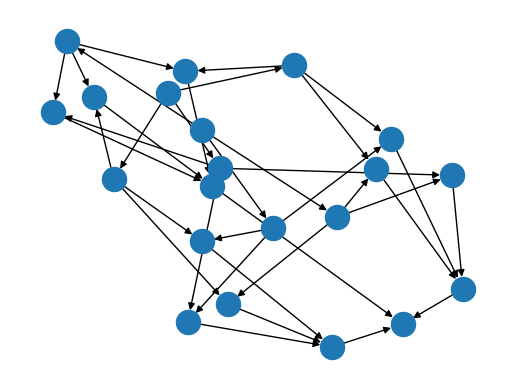

In [60]:
#Visualitzem el sistema



Abans d'aplicar el nostre model a totes les dades que tenim hem de testejar-lo amb un parell d'exemples.
Quin serà el potencial d'un jugador de 17 anys i una passada de 40?. I si tingués una passada de 80?. Evalua també els dos casos anteriors si tingués una edat de 23 anys


54.222222222222186


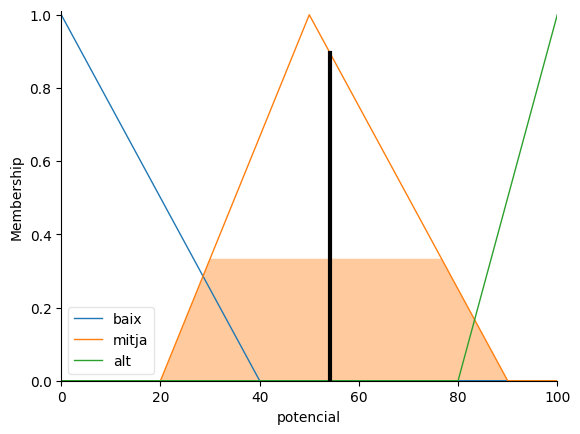

63.465367765381686


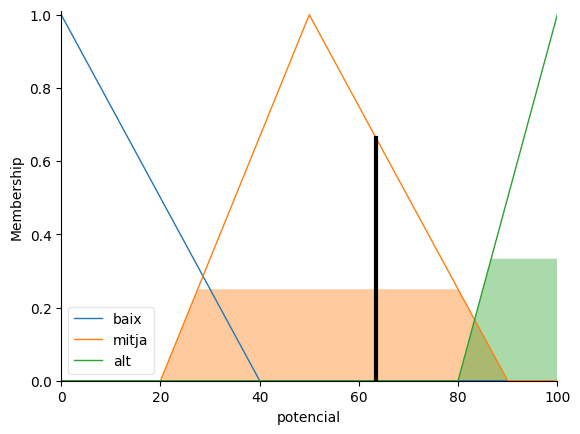

14.0


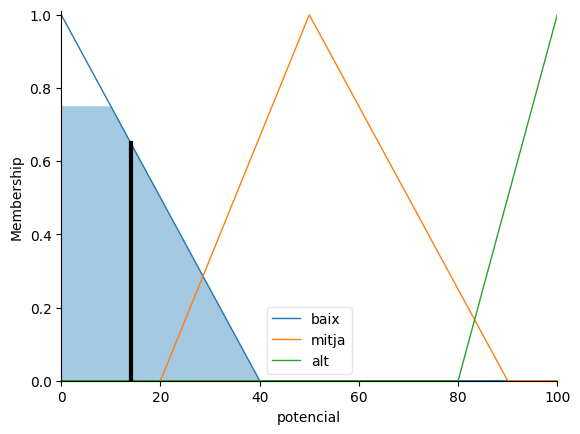

52.051282051282044


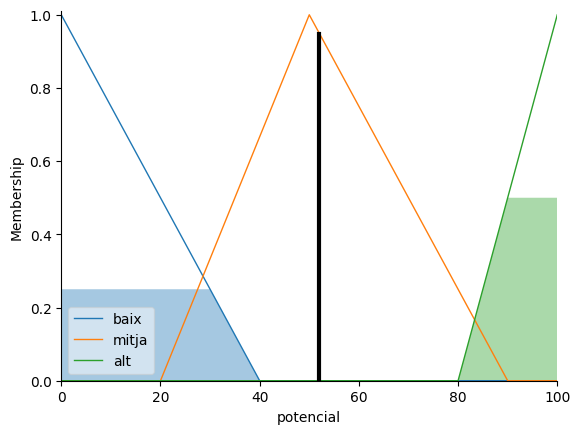

## Actualitzar el DataFrame

Actualitza el dataframe amb les dades calculades pel nostre model. Crea una columna anomenada "potencial" amb les dades que hem calculat. 

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,potencial
138,235790,https://sofifa.com/player/235790/kai-havertz/2...,K. Havertz,Kai Lukas Havertz,"CAM, CF, CM",84,92,94500000.0,130000.0,22,...,55+3,55+3,62+3,17+3,https://cdn.sofifa.net/players/235/790/22_120.png,https://cdn.sofifa.net/teams/5/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png,49.751276
139,237692,https://sofifa.com/player/237692/phil-foden/22...,P. Foden,Philip Foden,"CAM, LW, CM",84,92,94500000.0,125000.0,21,...,59+3,59+3,68+3,19+3,https://cdn.sofifa.net/players/237/692/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png,51.697649
193,233064,https://sofifa.com/player/233064/mason-mount/2...,M. Mount,Mason Mount,"CAM, CM, RW",83,89,58500000.0,120000.0,22,...,60+3,60+3,68+3,19+3,https://cdn.sofifa.net/players/233/064/22_120.png,https://cdn.sofifa.net/teams/5/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png,60.886335
252,220697,https://sofifa.com/player/220697/james-maddiso...,J. Maddison,James Maddison,"CAM, CM",82,85,41500000.0,100000.0,24,...,57+2,57+2,65+2,20+2,https://cdn.sofifa.net/players/220/697/22_120.png,https://cdn.sofifa.net/teams/95/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png,63.118280
254,222665,https://sofifa.com/player/222665/martin-odegaa...,M. Ødegaard,Martin Ødegaard,"CAM, CM",82,88,49000000.0,89000.0,22,...,60+3,60+3,68+3,19+3,https://cdn.sofifa.net/players/222/665/22_120.png,https://cdn.sofifa.net/teams/1/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1352/60.png,https://cdn.sofifa.net/flags/no.png,58.224722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19169,264072,https://sofifa.com/player/264072/bernardo-oliv...,Bernardo,Bernardo Oliveira,CAM,49,67,120000.0,500.0,17,...,39+2,39+2,42+2,14+2,https://cdn.sofifa.net/players/264/072/22_120.png,https://cdn.sofifa.net/teams/111393/60.png,https://cdn.sofifa.net/flags/au.png,NaN,https://cdn.sofifa.net/flags/br.png,54.222222
19171,264142,https://sofifa.com/player/264142/aaron-doran/2...,A. Doran,Aaron Doran,CAM,49,62,110000.0,500.0,18,...,42+2,42+2,44+2,14+2,https://cdn.sofifa.net/players/264/142/22_120.png,https://cdn.sofifa.net/teams/305/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png,53.611111
19194,259649,https://sofifa.com/player/259649/engson-singh/...,E. Singh,Engson Singh,"CAM, CM",48,65,120000.0,500.0,18,...,37+2,37+2,41+2,12+2,https://cdn.sofifa.net/players/259/649/22_120.png,https://cdn.sofifa.net/teams/113146/60.png,https://cdn.sofifa.net/flags/in.png,NaN,https://cdn.sofifa.net/flags/in.png,53.611111
19233,261818,https://sofifa.com/player/261818/ronan-gallagh...,R. Gallagher,Ronan Gallagher,CAM,47,61,110000.0,500.0,20,...,39+2,39+2,41+2,15+2,https://cdn.sofifa.net/players/261/818/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png,53.611111


## Conclusions

Si observem els resultats podem concloure que el nostre model és bastant coherent, encara que els nombres no siguin del tot realistes.
Com podem millorar el model? Agrega alguna millora pròpia o basada en el treball de Luka Radovanović i comenta els resultats.